# ML Notebook 4: Supervised Learning Classification
## Models: Regression Classification and Multi-Class Classification

In [1]:
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [12]:
plt.style.use('ggplot') # fast
plt.style.use('fast')
plt.rcParams['axes.grid'] = False

# Model 1: Regression classification using our visual feature topic matrix as features

In [30]:
# read our files
train = pd.read_csv('data/SCUT-FBP5500_v2/train_bovw.zip')
test = pd.read_csv('data/SCUT-FBP5500_v2/test_bovw.zip')    
test['male'] = test['male'].fillna(0)
test['asian'] = test['asian'].fillna(0)

train['male'] = train['male'].fillna(0)
train['asian'] = train['asian'].fillna(0)

In [31]:
X_train = train.iloc[:,2:]
y_train = train['rating']
X_test = test.iloc[:,2:]
y_test = test['rating']

In [16]:
y_test.shape

(2200,)

In [17]:
y_pred.shape

(2200,)

In [34]:
# grid search pipeline example
# pipelines
pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestRegressor(random_state=42))])

pipe_svr = Pipeline([('scl', StandardScaler()),
			('clf', SVR())])
# Set grid search params
param_range = [9, 10,20,30]
param_range_fl = [1.0, 0.5]
estimators = [200,250,300,350]

grid_params_rf = [{'max_depth': param_range,
        'n_estimators': estimators,
        'min_samples_split': param_range[1:]}]

grid_params_svr = [{'kernel': ['rbf'], 
        'C': param_range_fl}]

# Construct grid searches
jobs = -1

gs_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
			param_grid=grid_params_rf,
			scoring='neg_mean_squared_error',
			cv=5, 
			n_jobs=jobs)
gs_svr = GridSearchCV(estimator=SVR(),
			param_grid=grid_params_svr,
			scoring='neg_mean_squared_error',
			cv=5,
			n_jobs=jobs)

# List of pipelines for iterating through each of them
# Removed rf do to fitting issues , gs_rf,
grids = [gs_svr, gs_rf]

# Creating a dict for our reference
grid_dict = {0: 'Support Vector Machine', 1: 'Random Forest'}

grid_dict_results = {}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = None
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training mean squared error score: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    acc = gs.score(X_test, y_test)
    print('Test set mean squared error  for best params: %.3f ' % acc)
    # Track best (highest test accuracy) model
    grid_dict_results[grid_dict[idx]] = [gs.cv_results_, gs.best_params_, gs.best_score_, acc]
    if acc > best_acc:
        best_acc = acc
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set score ( mean squared error ): %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
gs_dump_file = 'best_grid_search_pipeline.pkl'
dict_dump_file = 'ml_gs_dict.pkl'
path1 = 'data/SCUT-FBP5500_v2/' + gs_dump_file
path2 = 'data/SCUT-FBP5500_v2/' + dict_dump_file
with open(path1, 'wb') as f:
    pickle.dump(gs, f)
with open(path2, 'wb') as f:
    pickle.dump(grid_dict_results, f)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], gs_dump_file))

Performing model optimizations...

Estimator: Support Vector Machine
Best params are : {'C': 1.0, 'kernel': 'rbf'}
Best training mean squared error score: -0.331
Test set mean squared error  for best params: -0.313 

Estimator: Random Forest
Best params are : {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 350}
Best training mean squared error score: -0.393
Test set mean squared error  for best params: -0.364 

Classifier with best test set score ( mean squared error ): Support Vector Machine

Saved Support Vector Machine grid search pipeline to file: best_grid_search_pipeline.pkl


# mean squared error for best model: 0.313 
# ----------------------------------------

In [47]:
gs_svr.fit(X_train, y_train)
y_pred = gs_svr.predict(X_test)
test['pred_rating'] = y_pred
test['difference'] = test.rating - test.pred_rating

In [42]:
with open('data/SCUT-FBP5500_v2/best_grid_search_pipeline.pkl', 'wb') as f:
    pickle.dump(gs, f)

In [49]:
y_pred  = gs.best_estimator_.predict(X_test)

In [46]:
gs.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=10, n_estimators=350,
                      random_state=42)

In [50]:
test['pred_rating'] = y_pred
test['difference'] = test.rating - test.pred_rating

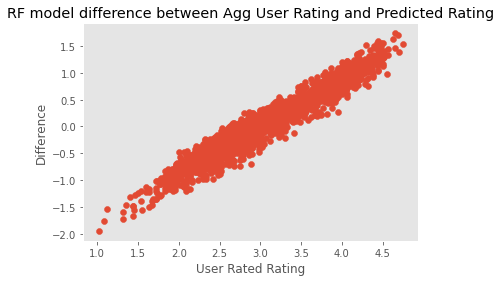

In [51]:
plt.scatter(test.rating, test.difference)
plt.xlabel('User Rated Rating')
plt.ylabel('Difference')
plt.title('RF model difference between Agg User Rating and Predicted Rating', fontdict={'color':'black'})
plt.show()

# Model 2: Multi-Class classification using all of our features

In [ ]:
# if using google colab for outsourced processing uncomment this cell

## Pandas needs to be updated on google drive to read in pickle files
# !pip install --upgrade pandas

# from google.colab import drive
# drive.mount('/drive')

## TRAINING Passive Aggressive Classifier

In [ ]:
# this cell calls the model
# The model can be re-loaded at various training stages as we save after each epoch batch

# first time we did this
#clf = PassiveAggressiveClassifier(random_state=42, n_jobs=-1, warm_start=True)

# reloading we call the pickled model from its local directory
clf = pickle.load(open('/drive/My Drive/Milestone 2 Project/ML_data/trained_PAC_CLF_batch_0013_model.pkl', 'rb'))

In [ ]:
def trainer(filename, model, batch_num, out_filename, regression=False):
    """
    Helper function for training epochs. 
    The path variable may be updated based on local storage set up.
    
    Params:
    filename: the date filename e.g train_batch_000.zip
    model: classifier model (e.g clf, clf_par, clf_pac)
    batch_num: This will name the exported classifier model
    out_filename: filename for epoch save after batch trained
    regression: if regression split data for regression
    
    Return:
    trains the model stored in MODEL parameter; returns nothing
    """
    print(f'--- Training {filename} started ---')
    # read in batch
    path = "/drive/My Drive/Milestone 2 Project/ML_data/" + filename 
    train = pd.read_csv(path)

    # separate
    if regression:
        # skip first two columns which are rating and filename
        y_train = train['rating']
        X_train = train.drop(['filename','rating'], axis = 1)
        model.partial_fit(X_train, y_train)
    
    else:
        # rounding rating because classifying
        # skip first two columns which are rating and filename
        X_train = train.iloc[:,2:]
        y_train = train['rating'].round(0).astype(int)
        
        # Classification classes are [1,2,3,4,5]
        model.partial_fit(X_train, y_train, classes=[1,2,3,4,5])

    # Save output
    with open(f"/drive/My Drive/Milestone 2 Project/ML_data/{out_filename}{batch_num}_model.pkl", 'wb') as out:
        pickle.dump(model, out)

    print(f"Training {filename} complete\n")
    
    return


In [ ]:
for ix in range(14):
    trainer(f'train_batch_00{ix}.zip', clf, ix, 'trained_PAC_CLF_batch_00')

## TESTING Passive Aggressive Classifier

In [2]:
# load in the classifier that we want to test
#clf = pickle.load(open('/drive/My Drive/Milestone 2 Project/ML_data/trained_PAC_CLF_batch_0013_model.pkl', 'rb'))


# dictionary holder for scores
test_scores = {}
def testing_func(filename, ix):
  path = '/drive/My Drive/Milestone 2 Project/ML_data/' + filename
  test = pd.read_csv(path)
  X_test = test.iloc[:,2:]
  
  # defining the rating by first rounding using numpy then cast to Integer
  # Classification classes are [1,2,3,4,5]
  y_test = test['rating'].astype('float').round(0).astype('int')

  y_pred = clf.predict(X_test)
  tmp_dict = {'filename':test['filename'],'rating':y_test,'pred_rating':y_pred}
  test_scores[ix] = pd.DataFrame.from_dict(tmp_dict)

  return


In [ ]:
for i in range(9):
    testing_func(f'test_batch_00{i}.zip', i)

In [ ]:
# Save output
# with open(f"/drive/My Drive/Milestone 2 Project/ML_data/test_scores.pkl", 'wb') as out:
#  pickle.dump(test_scores,out)

In [ ]:
# test = pickle.load(open("/drive/My Drive/Milestone 2 Project/ML_data/test_scores.pkl", 'rb'))
test_scores_df = pd.DataFrame()
for v in test.values():
  test_scores_df = pd.concat([test_scores_df, v])

In [9]:
# read in scores for charting
test_scores_df = pd.read_csv('data/SCUT-FBP5500_v2/scores/test_scores_PAC_complete.csv')

In [11]:
test_scores_df[['filename','rating','pred_rating']]

,filename,rating,pred_rating
0,AM1242.jpg,2,2
1,AF605.jpg,3,3
2,CM480.jpg,3,2
3,AM988.jpg,3,2
4,AF1595.jpg,4,2
...,...,...,...
2195,AM917.jpg,3,2
2196,AF842.jpg,3,2
2197,CM62.jpg,3,2
2198,CM379.jpg,3,2


In [13]:
pac_clf_accu_scr = accuracy_score(test_scores_df.rating, test_scores_df.pred_rating)
# 0.3030769230769231
pac_clf_accu_scr

0.30227272727272725

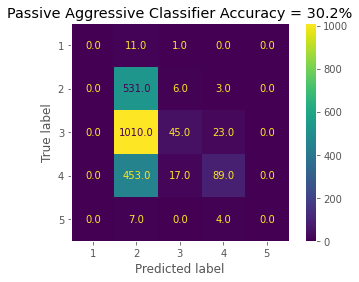

In [16]:
cm = confusion_matrix(test_scores_df.rating, test_scores_df.pred_rating, labels= [1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])
disp.plot(values_format = '.1f')
plt.title('Passive Aggressive Classifier Accuracy = 30.2%', fontdict={'color':'black'})
plt.show()

In [19]:
print(classification_report(test_scores_df.rating, test_scores_df.pred_rating, labels= [1,2,3,4,5], zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.26      0.98      0.42       540
           3       0.65      0.04      0.08      1078
           4       0.75      0.16      0.26       559
           5       0.00      0.00      0.00        11

    accuracy                           0.30      2200
   macro avg       0.33      0.24      0.15      2200
weighted avg       0.57      0.30      0.21      2200



# Model 3: Passive Aggressive Regressor using all of our features

## TRAINING Passive Aggressive Classifier

In [ ]:
# initial classifier objects
#clf_par = PassiveAggressiveRegressor(random_state=42, warm_start=True, max_iter=100) # cold start
#clf_par_cold = PassiveAggressiveRegressor(random_state=42, max_iter=100) # warm start

# loading in trained classifier
clf_par = pickle.load(open('/drive/My Drive/Milestone 2 Project/ML_data/trained_PAR_CLF_batch_0013_model.pkl', 'rb'))
clf_par_cold = pickle.load(open('/drive/My Drive/Milestone 2 Project/ML_data/trained_PAR_CLF_cold_batch_0013_model.pkl', 'rb'))

In [ ]:
for ix in range(14):
  trainer(f'train_batch_00{ix}.zip', clf_par, ix, 'trained_PAR_CLF_batch_00', regression=True)

In [ ]:
for ix in range(14):
  trainer(f'train_batch_00{ix}.zip', clf_par_cold, ix, 'trained_PAR_CLF_cold_batch_00', regression=True)

## TESTING Passive Aggressive Classifier

### Batch of 250 Testing

In [ ]:
test_scores_par_cold = {}
for i in range(9):
  testing_func(f'test_batch_00{i}.zip', test_scores_par_cold,clf_par_cold, i)

In [ ]:
test_scores_par = {}
for i in range(9):
  testing_func(f'test_batch_00{i}.zip', test_scores_par,clf_par, i)

### Warm Start Regression

In [ ]:
# compiling results
test_scores_par_df = pd.DataFrame()
for v in test_scores_par.values():
  test_scores_par_df = pd.concat([test_scores_par_df, v])
  
# Save output
test_scores_par_df.to_csv('/drive/My Drive/Milestone 2 Project/ML_data/test_scores_par.csv')

In [ ]:
# 1.7645511309027233
mean_squared_error(test_scores_par_df.rating, test_scores_par_df.pred_rating)

### Cold Start Regression

In [ ]:
# compiling results
test_scores_par_cold_df = pd.DataFrame()
for v in test_scores_par_cold.values():
  test_scores_par_cold_df = pd.concat([test_scores_par_cold_df, v])

test_scores_par_cold_df.to_csv('/drive/My Drive/Milestone 2 Project/ML_data/test_scores_par_cold_df.csv')

In [ ]:
# 1.7672724947604106
mean_squared_error(test_scores_par_cold_df.rating, test_scores_par_cold_df.pred_rating)